In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [6]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/Figure/Figure5_2/"

In [7]:
#load the data that the true value predicts the fitness
seg12feature_data = pd.read_csv(readdata_dir + "FeaturePredictFitness/553features#82_genotype_seg12.txt", sep = "\t")
seg12feature_datafilter = seg12feature_data[seg12feature_data["mutation_list"] == '[7, 8, 9, 11, 19, 20, 21, 22, 23]' ]
wt_data = pd.read_csv(readdata_dir + "AAindex/wild_553_12.txt",sep ="\t")

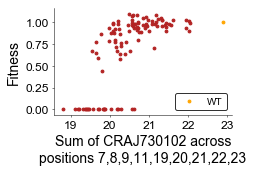

In [8]:
seg12fitness_list = seg12feature_datafilter["fitness"].values
seg12featureUPredict_list =seg12feature_datafilter["CRAJ730102"].values
plt.figure(figsize=(3.5,2.5))
ax = plt.subplot(111)
ax.scatter(seg12featureUPredict_list,seg12fitness_list,color = "firebrick",s = 8)
ax.scatter(wt_data.loc[11, "CRAJ730102"],1,color = "orange",
          s = 8,label = "WT")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
       
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
plt.xticks(fontsize =12 )
plt.yticks(fontsize = 12)

plt.legend(edgecolor='black')
plt.xlabel("Sum of CRAJ730102 across\npositions 7,8,9,11,19,20,21,22,23",fontsize = 14)
plt.ylabel("Fitness",fontsize = 14)
plt.tight_layout()
plt.savefig(savedata_dir + "predictCARJ.png",dpi = 300)
plt.show()
plt.close()

In [9]:
#loda the CRAJ730102 feature predicts 
CRAJ730102_predictData = pd.read_csv(readdata_dir + "FeaturePredictCompensation/example/CRAJ730102_Predict.tsv",sep = "\t")
CRAJ730102_notPredictData = pd.read_csv(readdata_dir + "FeaturePredictCompensation/example/CRAJ730102_notPredict.tsv",sep = "\t")
CRAJ730102_originalData = pd.read_csv(readdata_dir + "FeaturePredictCompensation/example/CRAJ730102_original.tsv",sep = "\t")
CRAJ730102_originalData

,feature,fitness
0,2.49,0.635862
1,3.06,0.000000
2,2.19,0.941481
3,2.20,0.909409
4,2.63,0.633328
...,...,...
101,2.27,0.000000
102,2.71,0.000000
103,1.55,1.028708
104,1.56,1.026057


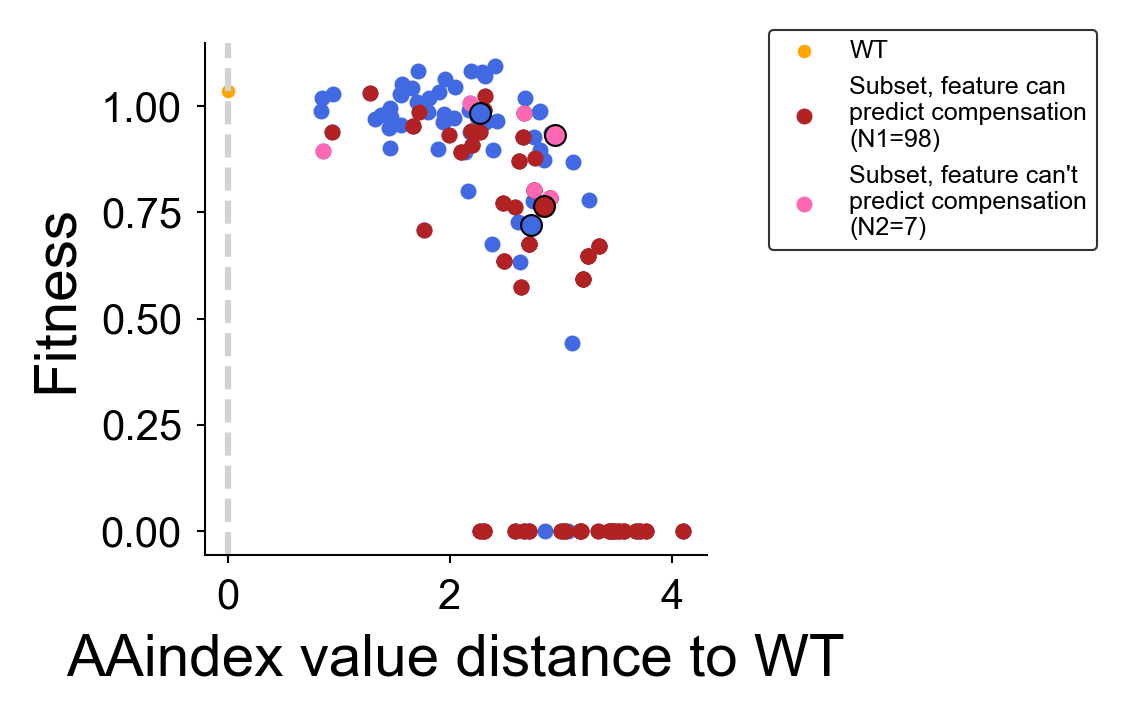

In [10]:
#show two arrows!
plt.rcParams['figure.dpi'] = 300
original_example_sub =  [0.984596 ,2.27]
sub_example = [0.765819, 2.85]
original_not_predict_example_sub = [0.721312,2.73]
sub_not_predict_example = [0.931300,2.95]

#plot the results to together
plt.figure(figsize=(4,2.5))
ax = plt.subplot(111)
ax.scatter(0,1.03634032726,color="orange",label="WT",s=5)
ax.scatter(CRAJ730102_originalData['feature'].values,
           CRAJ730102_originalData['fitness'].values,s=8,color = "royalblue")
            



ax.scatter(CRAJ730102_predictData["this_feature"].values,
           CRAJ730102_predictData["this_fitness"].values,s=8,color="firebrick",label="Subset, feature can\npredict compensation\n(N1=98)",
        )
ax.scatter(CRAJ730102_notPredictData['this_feature'].values
           ,CRAJ730102_notPredictData['this_fitness'],s=8,color="hotpink",
           label = "Subset, feature can't\npredict compensation\n(N2=7)")


ax.scatter(original_example_sub[1], original_example_sub[0], color = "royalblue",edgecolors='k',
          linewidths = 0.5,s=25)
ax.scatter(original_not_predict_example_sub[1], original_not_predict_example_sub[0], color = "royalblue",edgecolors='k',
          linewidths = 0.5,s=25)



ax.scatter(sub_example[1],sub_example[0],color ="firebrick",edgecolors='k',
          linewidths = 0.5,s=25)
ax.scatter(sub_not_predict_example[1],sub_not_predict_example[0],color = "hotpink",edgecolors='k'
          ,linewidths = 0.5,s=25)




plt.axvline(0,ls="--",color="lightgrey")
ax.set_axisbelow(True)
                 
legend = plt.legend(fontsize=6, bbox_to_anchor=(1.1, 1.05),scatterpoints=1,edgecolor='black')
legend = legend.get_frame().set_linewidth(0.5)


plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
#add label 
plt.xlabel("AAindex value distance to WT",fontsize = 14)
plt.ylabel("Fitness",fontsize=14)
plt.tight_layout()
#save figure
plt.savefig(savedata_dir + "carj_preict_compensa_subset.png",dpi=300)

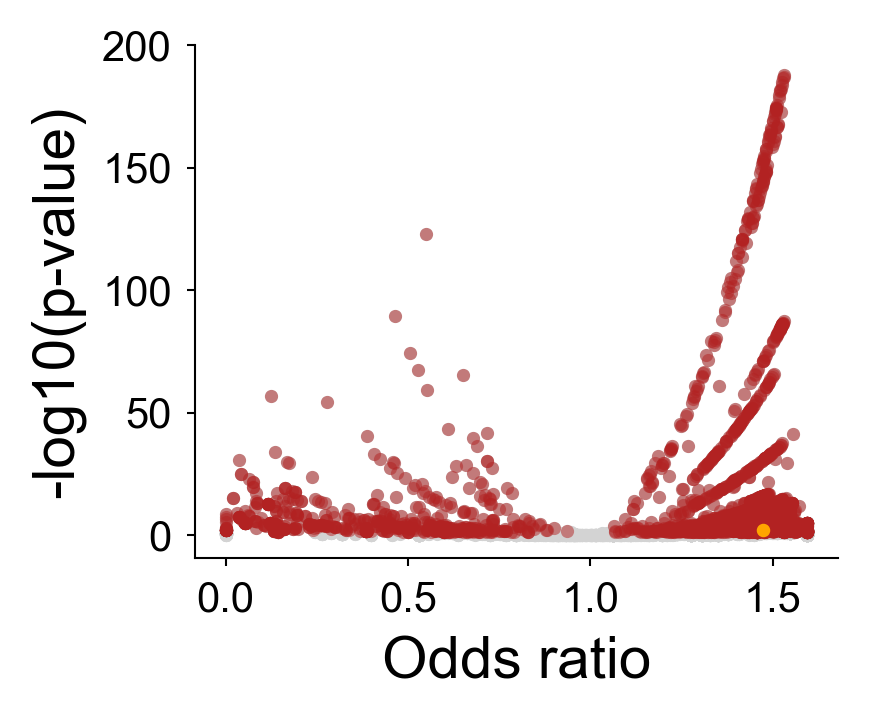

In [58]:
#figure of example
import math

plt.figure(figsize=(3,2.5))
ax =plt.subplot(111)
df_all_sub = pd.read_csv(readdata_dir  + "FeaturePredictCompensation/subset/featurePredictCompensation_subsetFEtest.csv",sep="\t")
df_all_sub_65_75 = df_all_sub[(df_all_sub["correlation"]<-0.65) & (df_all_sub["correlation"] >= -0.75)]

a = ax.scatter(np.array(df_all_sub_65_75['odds_ratio'])
            ,np.array(df_all_sub_65_75['log10_pvalue']),s=10,color="lightgrey",linewidths = 0)
b = ax.scatter( df_all_sub_65_75[df_all_sub_65_75["p_value"] < 0.05]["odds_ratio"].values,
            df_all_sub_65_75[df_all_sub_65_75["p_value"] < 0.05]["log10_pvalue"].values ,color="firebrick",s=10,alpha=0.5,
              linewidths = 0)
plt.scatter(1.4735414063172252, -math.log10(0.007318130461165996),s=5,color = "orange")
plt.xlabel("Odds ratio", fontsize=14) 
plt.xticks([0,0.5,1.0,1.5],[0.0,0.5,1.0,1.5],fontsize = 10)
plt.yticks([0,50,100,150,200],fontsize=10)
plt.ylabel("-log10(p-value)",fontsize=14)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
#plt.legend([a, b], ['pvalue >= 0.05', 'pvalue < 0.05'], loc='upper right', scatterpoints=1,edgecolor='white',fontsize=8)
#plt.text(1.6,2.8,"% of oddsratio>1 &\npvalue<0.05:26.3%")
plt.tight_layout()
#save the figure
plt.savefig(savedata_dir + "one_example.png",dpi = 300)

-0.9500000000000007


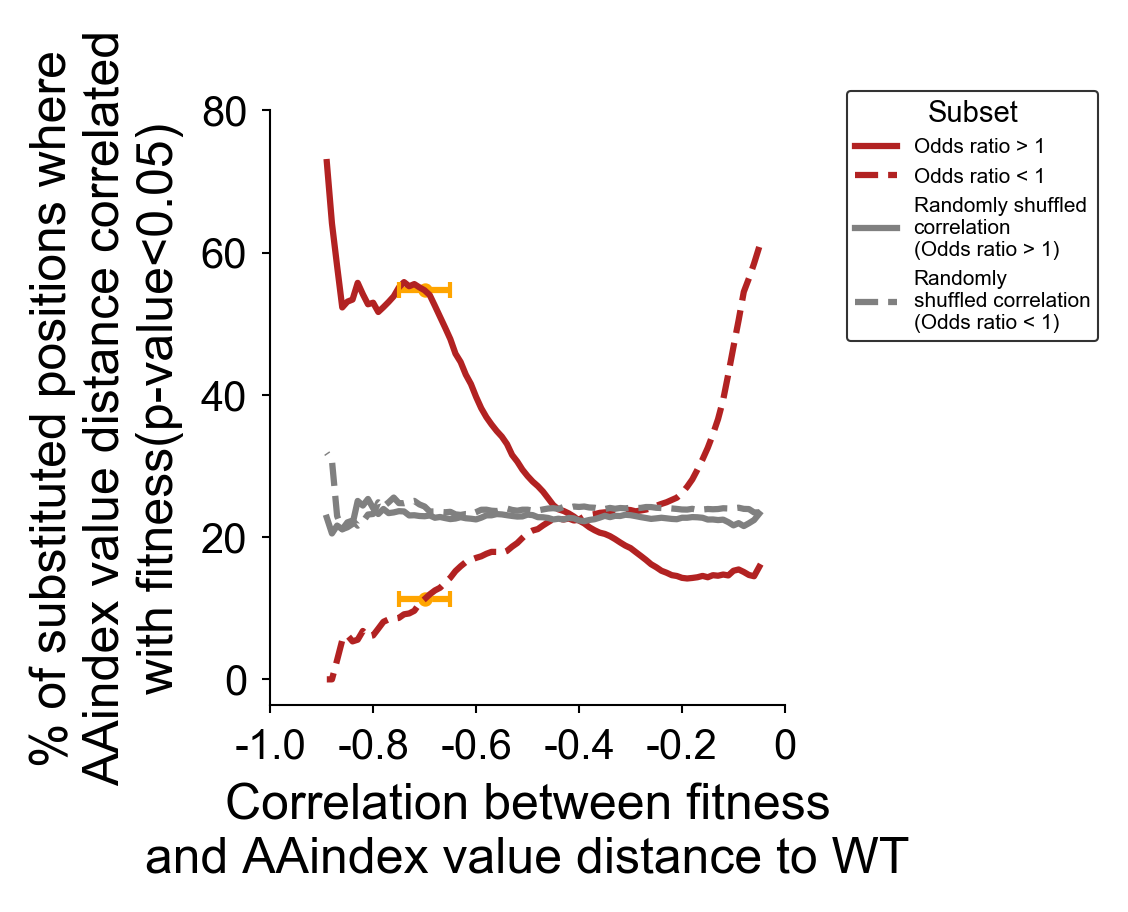

In [70]:
#plot the results to together
length = 0.01
mean_range_list_su = []
su_or_big1_list = []
su_or_small1_list = []
start = 0
end = -0.1

while True:
    df_all_su_filter = df_all_sub.loc[(df_all_sub["correlation"] >= end) & (df_all_sub["correlation"] < start),:]  
    df_all_len = df_all_su_filter.shape[0]
    if df_all_len <= 10:
        break
    len_sig_su_big = df_all_su_filter.loc[(df_all_su_filter["p_value"]<0.05) & (df_all_su_filter["odds_ratio"]>1),:].shape[0]
    len_sig_su_small = df_all_su_filter.loc[(df_all_su_filter["p_value"]<0.05) & (df_all_su_filter["odds_ratio"]<1),:].shape[0]
    mean_range_list_su.append((start+end)/2)
    
    su_or_big1_list.append(100*len_sig_su_big/df_all_len)
    su_or_small1_list.append(100*len_sig_su_small/df_all_len)
    start -=length
    end -=length
    if end < -1.0:
        break
            

length = 0.01
mean_range_list_su_shu = []
su_or_big1_list_shu = []
su_or_small1_list_shu = []
start = 0
end = -0.1

while True:
    df_all_su_filter = df_all_sub.loc[(df_all_sub["correlation_shuffled"] >= end) & (df_all_sub["correlation_shuffled"] < start),:]  
    if df_all_su_filter.shape[0] <= 10:
        print(end)
        break
    df_all_len = df_all_su_filter.shape[0]
    len_sig_su_big_shu = df_all_su_filter.loc[(df_all_su_filter["p_value"]<0.05) & (df_all_su_filter["odds_ratio"]>1),:].shape[0]
    len_sig_su_small_shu = df_all_su_filter.loc[(df_all_su_filter["p_value"]<0.05) & (df_all_su_filter["odds_ratio"]<1),:].shape[0]
    mean_range_list_su_shu.append((start+end)/2)
    
    su_or_big1_list_shu.append(100*len_sig_su_big_shu/df_all_len)
    su_or_small1_list_shu.append(100*len_sig_su_small_shu/df_all_len)
    start -=length
    end -=length
    if end < -1.0:
        break
        



plt.figure(figsize=(4,3))
ax = plt.subplot(111)



ax.plot(mean_range_list_su,su_or_big1_list,label="Odds ratio > 1" ,color="firebrick")
ax.plot(mean_range_list_su,su_or_small1_list,color="firebrick",ls="--",label="Odds ratio < 1")
ax.plot(mean_range_list_su_shu,su_or_big1_list_shu,color="grey",label="Randomly shuffled\ncorrelation\n(Odds ratio > 1)")
ax.plot(mean_range_list_su_shu,su_or_small1_list_shu,color="grey",ls="--",label="Randomly\nshuffled correlation\n(Odds ratio < 1)")

#add eoorbar
plt.errorbar( x=-0.70,y=54.69703131354209,xerr=0.05,color="orange",capsize=2,barsabove =True)
eb2 = plt.errorbar( x=-0.70,y=11.285075233834892,xerr=0.05,color="orange",capsize=2,barsabove =True,errorevery=3)
eb2[-1][0].set_linestyle('--')

ax.scatter( x=-0.70,y=54.69703131354209,color="orange",s=6)
ax.scatter( x=-0.70,y=11.285075233834892,
            color="orange",s=6)



                 
legend = plt.legend(fontsize=5, bbox_to_anchor=(1.1, 1.05),scatterpoints=1,edgecolor='black',
                   title = "Subset",title_fontsize = 7)
legend = legend.get_frame().set_linewidth(0.5)


plt.xticks([-1.0,-0.8,-0.6,-0.4,-0.2,0],[-1.0,-0.8,-0.6,-0.4,-0.2,0],fontsize = 10)
plt.yticks([0,20,40,60,80],[0,20,40,60,80],fontsize = 10)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#modify the lindwidth of the lines 
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
    
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params( axis='both',length=2)
#add label 
plt.xlabel("Correlation between fitness\nand AAindex value distance to WT",fontsize = 12)
plt.ylabel("% of substituted positions where\nAAindex value distance correlated\nwith fitness(p-value<0.05)",fontsize=12)
plt.tight_layout()
#save figure
plt.savefig(savedata_dir + "carj_subet_predict_compen.png",dpi=300)